<a href="https://colab.research.google.com/github/LukaszSzarecki/music-source-separation/blob/develop/ml_algorithms_user_pl_small_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[PL]** W ramach tego notatnika można przetestować wytrenowane modele, pobrane z repozytorium. Należy wgrać model, następnie utwór z link YT. Po czym uruchomić separacje i przystąpić do słuchania.

In [ ]:
!pip install nussl
!pip install scaper
!pip install git+https://github.com/source-separation/tutorial

import nussl
import matplotlib.pyplot as plt
import numpy as np

# Pobranie modeli zapisanych w repozytorium

In [ ]:
from common import utils
from common.models import MaskInference

In [ ]:
!git clone -b models https://github.com/LukaszSzarecki/music-source-separation.git


Modele na repozytorium:

In [ ]:
import os
from pprint import pprint

model_dir = '/content/music-source-separation/models/'
new_models_names = os.listdir(model_dir + 'new/')
old_models_names = os.listdir(model_dir + 'old/')

pprint("New trained models")
for m in new_models_names:
  pprint(m)

pprint("Old trained models")
for m in old_models_names:
  pprint(m)

["old/" + model_name for model_name in old_models_names]

old_models_paths = ["old/" + model_name for model_name in old_models_names]
new_models_paths = ["new/" + model_name for model_name in new_models_names]


'New trained models'
'bestbest.model_bass_12_11_e100_m40.pth'
'bestbest.model_percussion_10_11_e100_m40.pth'
'bestbest.model_vocal_11_11_e100_m40.pth'
'Old trained models'
'best.model_vocal_30_10_e10_m25.pth'
'best.model_percussion_28_10_e5_m15.pth'
'best.model_bass_29_10_e5_m15.pth'
'best.model_bass_29_10_e5_m30.pth'


# Wczytanie wszystkich modeli

In [ ]:
selected_model = [match for match in new_models_paths if "percussion" in match][0]

print(selected_model)

separator_1 = nussl.separation.deep.DeepMaskEstimation(
    nussl.AudioSignal(), model_path=model_dir+selected_model,
    device="cuda",
)

In [ ]:
selected_model = [match for match in new_models_paths if "vocal" in match][0]

print(selected_model)


separator_2 = nussl.separation.deep.DeepMaskEstimation(
    nussl.AudioSignal(), model_path=model_dir+selected_model,
    device="cuda",
)

In [ ]:
selected_model = [match for match in new_models_paths if "bass" in match][0]

print(selected_model)


separator_3 = nussl.separation.deep.DeepMaskEstimation(
    nussl.AudioSignal(), model_path=model_dir+selected_model,
    device="cuda",
)

# Wczytanie dowolnego utworu z YT

In [ ]:
!pip install youtube-dl #for downloading video/audio from youtube

import youtube_dl

## I utwór

In [ ]:
ydl_args = {
  'format' : 'bestaudio/best',
  'outtmpl' : 'audio_sample.mp3'
}

ydl = youtube_dl.YoutubeDL(ydl_args)

song_yt_link = 'https://youtu.be/aJ5IzGBnWAc?list=RDaJ5IzGBnWAc' 

ydl.download([song_yt_link])

In [ ]:
stft_params = nussl.STFTParams(window_length=1024, hop_length=512, window_type='sqrt_hann') 


signal_sample = nussl.AudioSignal('audio_sample.mp3')
signal_sample.to_mono()
signal_sample.stft(*stft_params)

signal_sample.embed_audio()


Lista modeli do separacji:


*   separator_1 - model separujący perkusje
*   separator_2 - moel separujący wokal
*   separator_3 - moel separujący bas

Dla utworu o długości około 4 min separacja wykonuje się 2-3 min

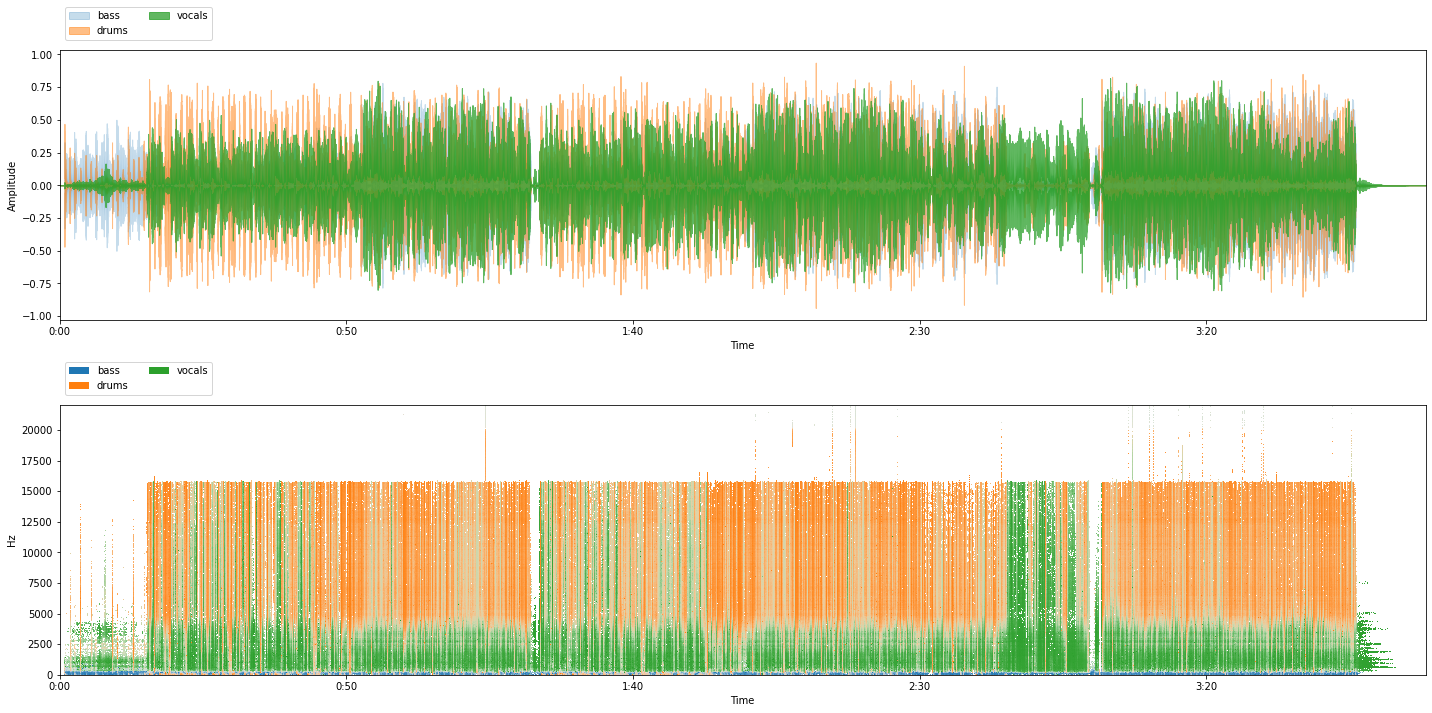

In [ ]:
from common import viz

separator_1.audio_signal = signal_sample
estimates1 = separator_1()


separator_2.audio_signal = signal_sample
estimates2 = separator_2()


separator_3.audio_signal = signal_sample
estimates3 = separator_3()


signal_sample_with_sources = {
    'mix': signal_sample,
    'sources':{
        'drums': estimates1[0],
        'vocals': estimates2[0],
        'bass': estimates3[0]
    }
}

viz.show_sources(signal_sample_with_sources['sources'])

In [ ]:
nussl.play_utils.multitrack(signal_sample_with_sources['sources'])

## II utwór

In [ ]:
ydl_args = {
  'format' : 'bestaudio/best',
  'outtmpl' : 'audio_sample2.mp3'
}

ydl = youtube_dl.YoutubeDL(ydl_args)

song_yt_link = 'https://www.youtube.com/watch?v=d8ekz_CSBVg' 

ydl.download([song_yt_link])

In [ ]:
stft_params = nussl.STFTParams(window_length=1024, hop_length=512, window_type='sqrt_hann') 


signal_sample2 = nussl.AudioSignal('audio_sample2.mp3')
signal_sample2.to_mono()
signal_sample2.stft(*stft_params)

signal_sample2.embed_audio()


Lista modeli do separacji:


*   separator_1 - model separujący perkusje
*   separator_2 - moel separujący wokal
*   separator_3 - moel separujący bas

Dla utworu o długości około 4 min separacja wykonuje się 2-3 min

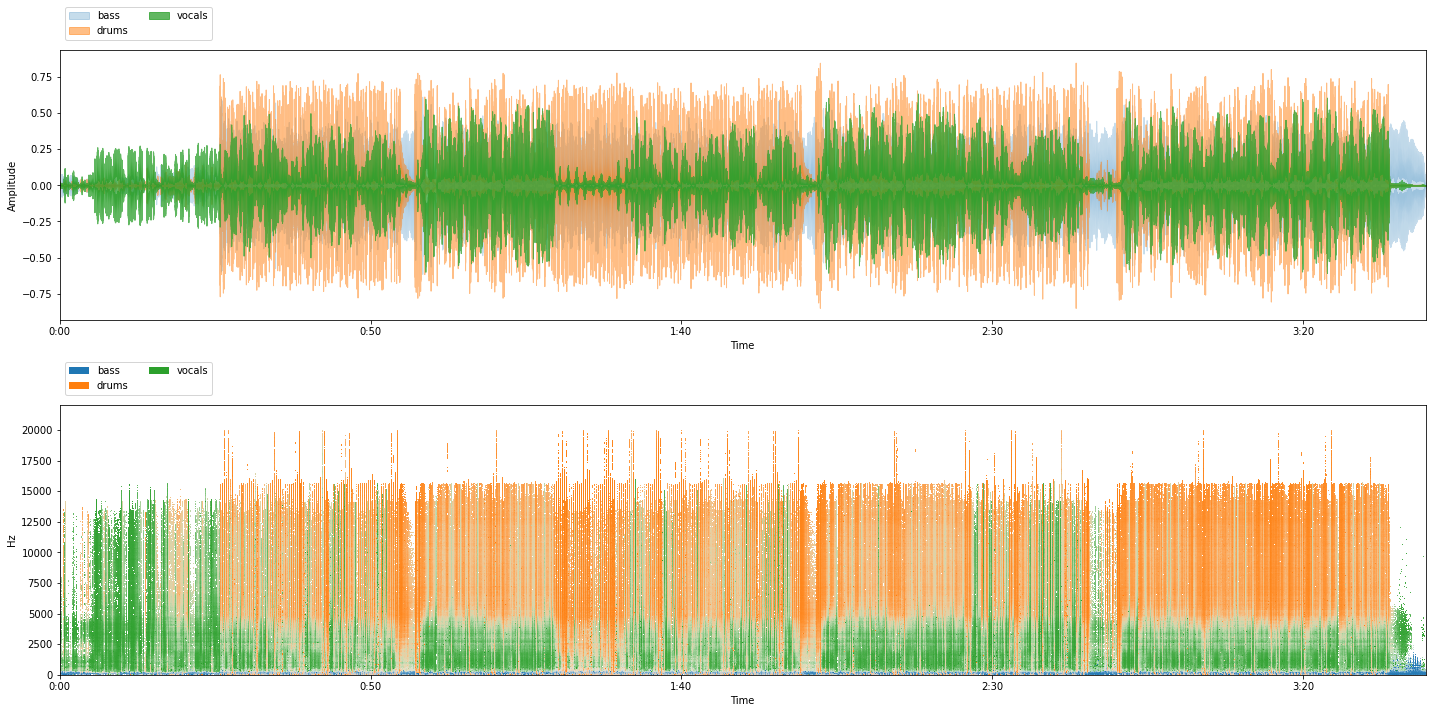

In [22]:
from common import viz

separator_1.audio_signal = signal_sample2
estimates1 = separator_1()


separator_2.audio_signal = signal_sample2
estimates2 = separator_2()


separator_3.audio_signal = signal_sample2
estimates3 = separator_3()


signal_sample_with_sources2 = {
    'mix': signal_sample2,
    'sources':{
        'drums': estimates1[0],
        'vocals': estimates2[0],
        'bass': estimates3[0]
    }
}

viz.show_sources(signal_sample_with_sources2['sources'])

In [ ]:
nussl.play_utils.multitrack(signal_sample_with_sources2['sources'])

## III utwór

In [ ]:
ydl_args = {
  'format' : 'bestaudio/best',
  'outtmpl' : 'audio_sample.mp3'
}

ydl = youtube_dl.YoutubeDL(ydl_args)

song_yt_link = 'https://www.youtube.com/watch?v=w1RttxsaIBY' 

ydl.download([song_yt_link])

In [ ]:
stft_params = nussl.STFTParams(window_length=1024, hop_length=512, window_type='sqrt_hann') 


signal_sample = nussl.AudioSignal('audio_sample.mp3')
signal_sample.to_mono()
signal_sample.stft(*stft_params)

signal_sample.embed_audio()


Lista modeli do separacji:


*   separator_1 - model separujący perkusje
*   separator_2 - moel separujący wokal
*   separator_3 - moel separujący bas

Dla utworu o długości około 4 min separacja wykonuje się 2-3 min

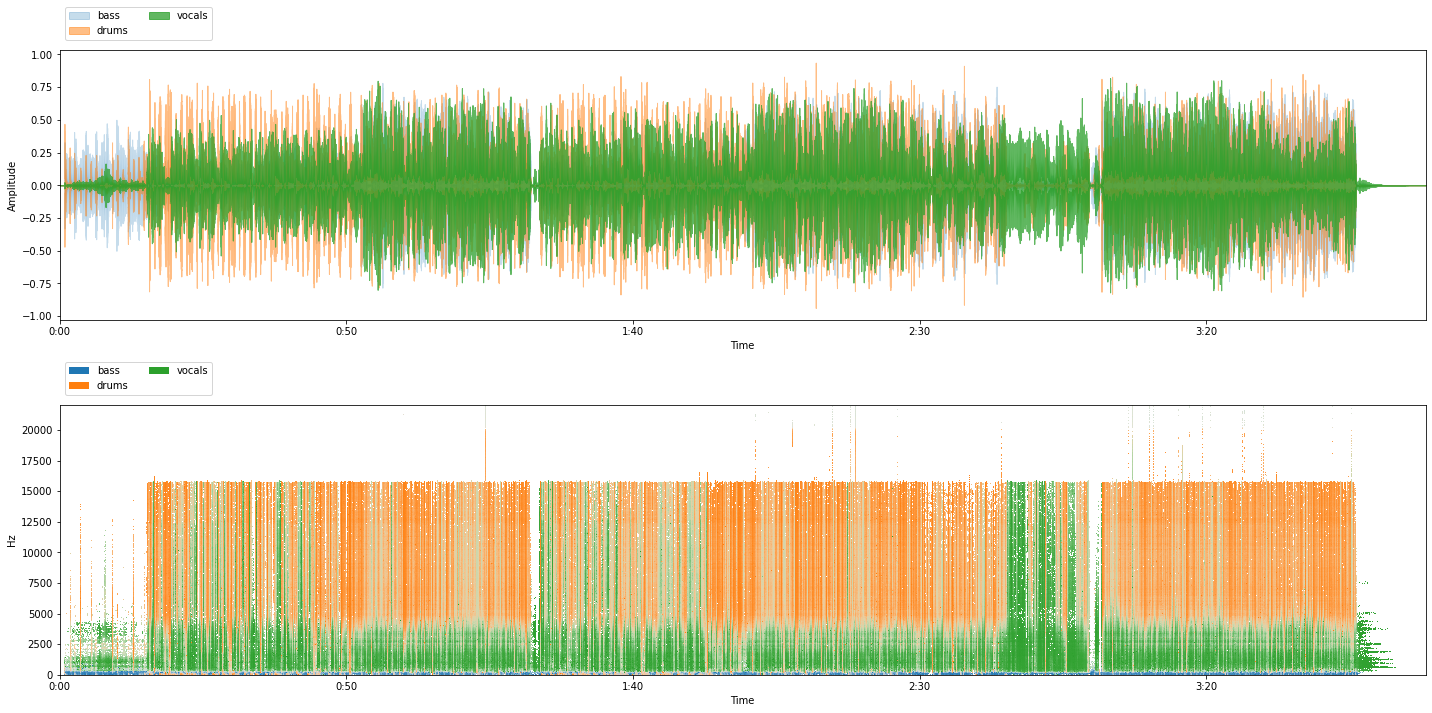

In [27]:
from common import viz

separator_1.audio_signal = signal_sample
estimates1 = separator_1()


separator_2.audio_signal = signal_sample
estimates2 = separator_2()


separator_3.audio_signal = signal_sample
estimates3 = separator_3()


signal_sample_with_sources = {
    'mix': signal_sample,
    'sources':{
        'drums': estimates1[0],
        'vocals': estimates2[0],
        'bass': estimates3[0]
    }
}

viz.show_sources(signal_sample_with_sources['sources'])

In [ ]:
nussl.play_utils.multitrack(signal_sample_with_sources['sources'])

## IV utwór

In [ ]:
ydl_args = {
  'format' : 'bestaudio/best',
  'outtmpl' : 'audio_sample4.mp3'
}

ydl = youtube_dl.YoutubeDL(ydl_args)

song_yt_link = 'https://www.youtube.com/watch?v=haW_ruZ_Be8' 

ydl.download([song_yt_link])

In [ ]:
stft_params = nussl.STFTParams(window_length=1024, hop_length=512, window_type='sqrt_hann') 


signal_sample = nussl.AudioSignal('audio_sample4.mp3')
signal_sample.to_mono()
signal_sample.stft(*stft_params)

signal_sample.embed_audio()


Lista modeli do separacji:


*   separator_1 - model separujący perkusje
*   separator_2 - moel separujący wokal
*   separator_3 - moel separujący bas

Dla utworu o długości około 4 min separacja wykonuje się 2-3 min

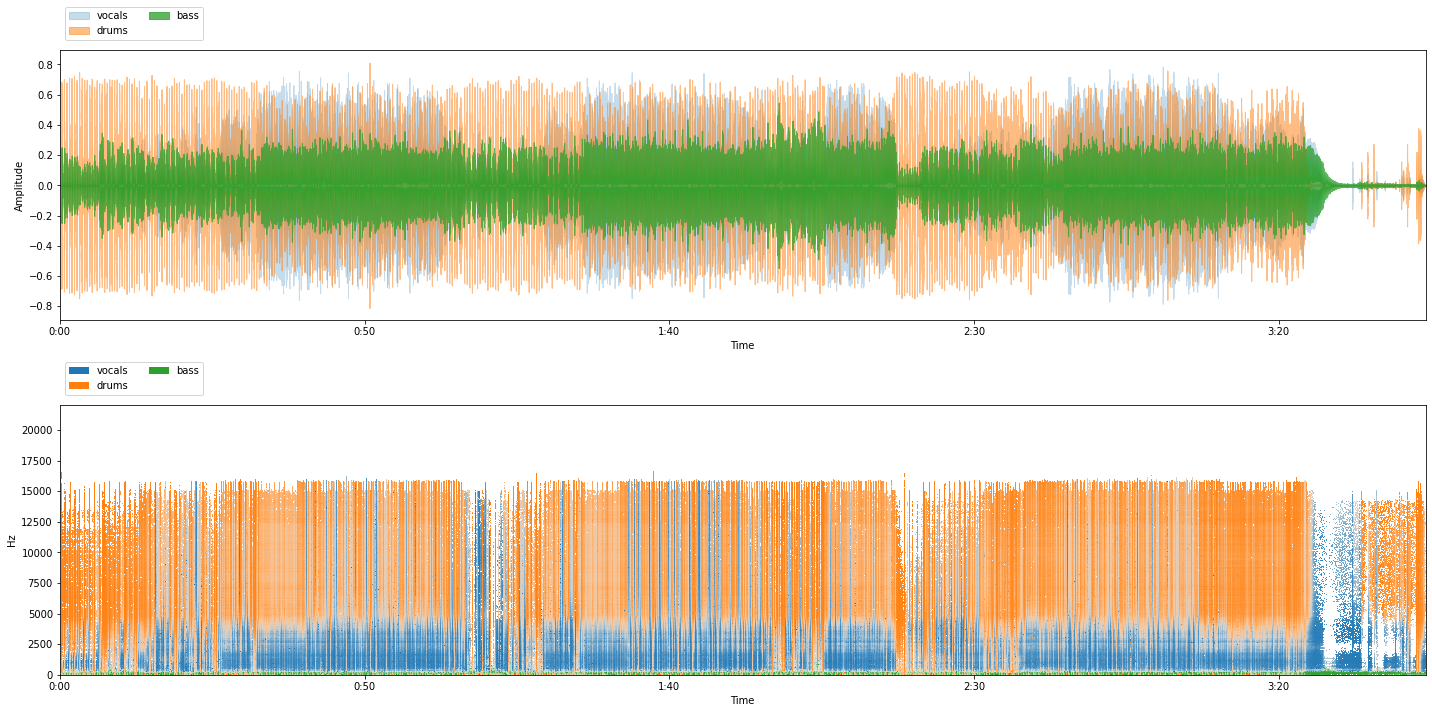

In [32]:
from common import viz

separator_1.audio_signal = signal_sample
estimates1 = separator_1()


separator_2.audio_signal = signal_sample
estimates2 = separator_2()


separator_3.audio_signal = signal_sample
estimates3 = separator_3()


signal_sample_with_sources = {
    'mix': signal_sample,
    'sources':{
        'drums': estimates1[0],
        'vocals': estimates2[0],
        'bass': estimates3[0]
    }
}

viz.show_sources(signal_sample_with_sources['sources'])

In [ ]:
nussl.play_utils.multitrack(signal_sample_with_sources['sources'])